In [58]:
import pandas as pd
import numpy as np
import random
from scipy.stats import norm

In [66]:
def N(x, M, D):
    return norm.cdf(x, M, D)

def P(alpha, pm, pf):
    return (alpha * pm) / (alpha * pm + (1 - alpha) * pf)

def M(df):
	return df[df['Male'] == True].height.median(), df[df['Male'] == False].height.median()

def alphas(df):
	alpha_m = df[df['Male'] == True].shape[0] / float(selection_len)
	alpha_f = 1 - alpha_m
	return alpha_m, alpha_f

def p(df):
	df['pm'] = df.height.apply(lambda x: N(x, Mm, D))
	df['pf'] = df.height.apply(lambda x: N(x, Mf, D))
	return

def Male(df):
	df['Male'] = df[['pm', 'pf']].apply(lambda x: P(alpha_m, x['pm'], x['pf']) > random.random(), axis=1)

def alpha_search(df, alpha_m, alpha_f):
	p(df)
	Male(df)
	alpha_m, alpha_f = alphas(df)
	Mm, Mf = M(df)
	print 'Mm:' + str(Mm) + ' Mf:' + str(Mf) + ' D:' + str(D) + ' alpha_m:' + str(alpha_m)# + ' alpha_f:' + str(alpha_f)
	return alpha_m, alpha_f, Mm, Mf

def alpha_test(alpha_row):
	try:
		eps_test = abs(np.mean(alpha_row[int(len(alpha_row)/2):]) - np.mean(alpha_row[:int(len(alpha_row)/2)]))
		print(str(eps_test) + ' -eps_test')
		return eps_test <= eps
	except:
		return False

In [67]:
A = np.array([random.randrange(160, 200) for x in range(1000)])
df = pd.DataFrame(data=A, columns=['height'])
selection_len = len(df.values)
D = df.height.std()**2
eps = 0.2

In [68]:
Mm = df.height.median()
Mf = df[(df['height'] > Mm) | (df['height'] < Mm)].height.median()
alpha_m = 0.5
alpha_f = 1 - alpha_m
alpha_row = np.array([alpha_m])

In [69]:
while not alpha_test(alpha_row):
	alpha_m, alpha_f, Mm, Mf = alpha_search(df, alpha_m, alpha_f)
	alpha_row = np.append(alpha_row, alpha_m)

nan -eps_test
Mm:180.0 Mf:178.0 D:131.389145145 alpha_m:0.513
0.013 -eps_test


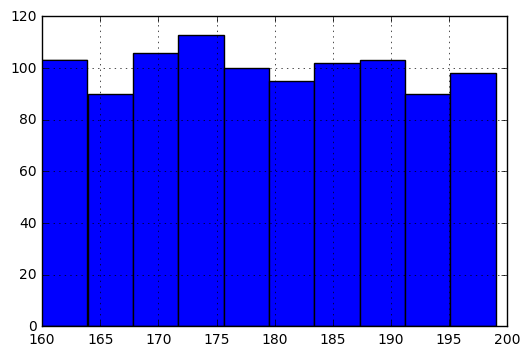

In [71]:
df.height.hist()